# Tomato Quality Classifier using SVM

### 1.Import Required Libraries

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 2.Set Configuration

In [18]:
IMG_SIZE = 128
DATASET_PATH = "tomato_dataset"  # Or '.' if folders are in root
CLASSES = ['good_quality', 'bad_quality']

### 3.Load & Process Images

In [19]:
images, labels = [], []
for label in CLASSES:
    folder = os.path.join(DATASET_PATH, label)
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder, filename)
            try:
                img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

print(f"Total images loaded: {len(images)}")

Total images loaded: 8


### 4.Prepare Data for SVM

In [20]:
X = np.array(images).reshape(len(images), -1)
y = LabelEncoder().fit_transform(labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### 5.Train the SVM Model

In [21]:
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### 6.Evaluate and Plot

SVM Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

good_quality       0.00      0.00      0.00         1
 bad_quality       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

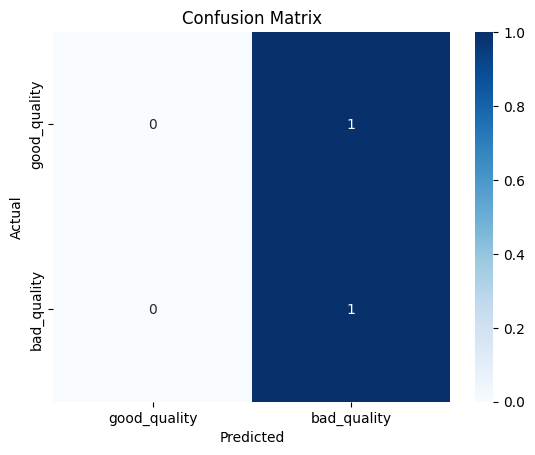

In [22]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=CLASSES))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ✅ Conclusion

We built a basic machine learning model using SVM to classify **good** and **bad quality tomatoes** from images.

- Resized and preprocessed the images
- Converted them into a format the model could understand
- Trained an SVM classifier to learn the patterns
- Evaluated its performance with accuracy and a confusion matrix

This project shows that with the right preparation, even simple models like SVM can give meaningful results in image classification tasks.